In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# 주피터 노트북에서 출력이 되게끔 해주는 문구
%matplotlib inline

In [9]:
train = pd.read_csv("train.csv", index_col = "PassengerId")
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [11]:
# head --> 상위 5개 출력해라는 뜻
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# tail --> 하위 5개를 출력해라
train.tail(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [13]:
train.shape

(891, 11)

In [14]:
# 데이터 확인
# Age가 714인 이유 --> 결측치가 891-714 => 결측치라는 뜻 --> 이것도 채우자
# Cabin 또한 약 690개의 데이터가 결측치임. --> 신뢰도가 낮은 데이터라는 뜻, 버리자
# Embarked --> 2개의 결측치가 존재 --> 결측치 채우자 이건
# 데이터분석은 결측치를 채우는게 가장 먼저임.
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [18]:
# 결측치가 몇개 있는지 측정 가능
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [26]:
# 생존자들 성별의 수
survived_1 = train[train['Survived']==1].loc[:, "Sex"].value_counts()

# 죽은 사람들의 성별의 수
survived_0 = train[train['Survived']==0].loc[:, "Sex"].value_counts()

print(survived_1)
print(survived_0)


female    233
male      109
Name: Sex, dtype: int64
male      468
female     81
Name: Sex, dtype: int64


In [38]:
df = pd.DataFrame([survived_1, survived_0], index = ["survived", "dead"])
df

,female,male
survived,233,109
dead,81,468


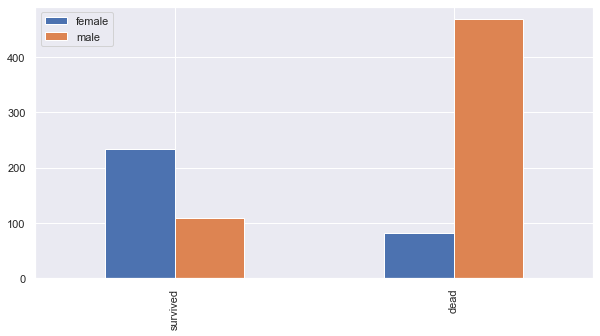

In [39]:
df.plot(kind = 'bar', figsize = (10, 5))

In [31]:
# DataFrame을 만드세요
# 생존자와 죽은 사람들의 Pclass가 담긴 데이터 프레임을 만드세요.
survived_p1 = train[train['Survived']==1].loc[:, "Pclass"].value_counts()
survived_p0 = train[train['Survived']==0].loc[:, "Pclass"].value_counts()

print(survived_p1)
print(survived_p0)



1    136
3    119
2     87
Name: Pclass, dtype: int64
3    372
2     97
1     80
Name: Pclass, dtype: int64


In [33]:
df2 = pd.DataFrame([survived_p1, survived_p0], index = ["survived", "dead"])
df2

,1,2,3
survived,136,87,119
dead,80,97,372


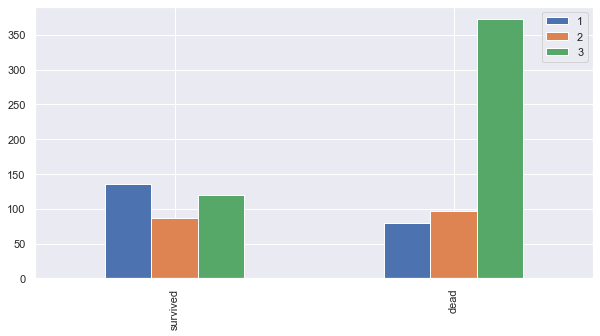

In [40]:
df2.plot(kind = 'bar', figsize = (10, 5))
plt.show()

In [47]:
def bar_chart(columns):
    s1 = train[train['Survived']==1].loc[:, columns].value_counts()
    s0 = train[train['Survived']==0].loc[:, columns].value_counts()
    
    df = pd.DataFrame([s1,s0], index = ["survived", "dead"])
    df.plot(kind = "bar", figsize = (10,5))
    plt.show()
    

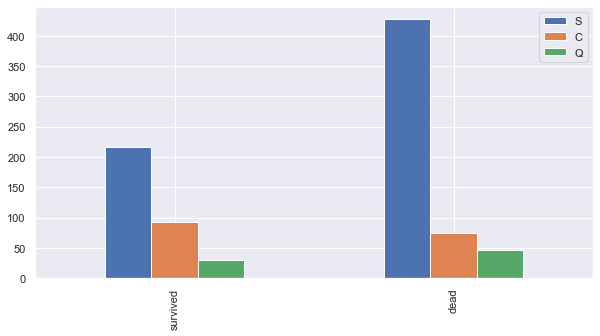

In [49]:
bar_chart("Embarked")

<bound method DataFrame.sum of              Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
PassengerId                                                                
1               False   False  False  False  False  False  False   False   
2               False   False  False  False  False  False  False   False   
3               False   False  False  False  False  False  False   False   
4               False   False  False  False  False  False  False   False   
5               False   False  False  False  False  False  False   False   
...               ...     ...    ...    ...    ...    ...    ...     ...   
887             False   False  False  False  False  False  False   False   
888             False   False  False  False  False  False  False   False   
889             False   False  False  False   True  False  False   False   
890             False   False  False  False  False  False  False   False   
891             False   False  False  False  False  False

## Age컬럼 결측치 채우기

In [54]:
train[train.loc[:, "Age"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


## Age 결측치 채우는 방법
- 여러 방법을 시도해봐라
1. 중간값 --- 남자면 남자의 중간값 / 여자면 여자의 중간값을 채워주는게 가장 좋은 방법
2. 최빈값
3. 평균값

In [56]:
train_age = train[train["Age"].isnull()]
train_age[["Age","Sex"]]

,Age,Sex
PassengerId,,
6,NaN,male
18,NaN,male
20,NaN,female
27,NaN,male
29,NaN,female
...,...,...
860,NaN,male
864,NaN,female
869,NaN,male


In [61]:
#groupby(컬럼명) -- 컬럼을 기준으로 데이터 그룹화
train.groupby("Sex").size()

train.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [62]:
train.groupby("Sex")["Age"].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [63]:
train["Age"] = train["Age"].fillna(train.groupby("Sex")["Age"].transform('median'))

In [65]:
train.info()
train[train.loc[:,"Age"].isnull()]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [66]:
# Age 컬럼의 카테고리화(그룹화)

# bin : 범위를 지정해준다.
bins = [0,15,25,35,60,99] # pd.cut 0~15, 15~25, 25~35, 35~60, 60~99
label = ['0','1','2','3','4']

train_cut = pd.cut(train.loc[:, "Age"],bins, labels = label)

train["Age"] = train_cut
train.head(5)





,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,2,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,8.0500,NaN,S


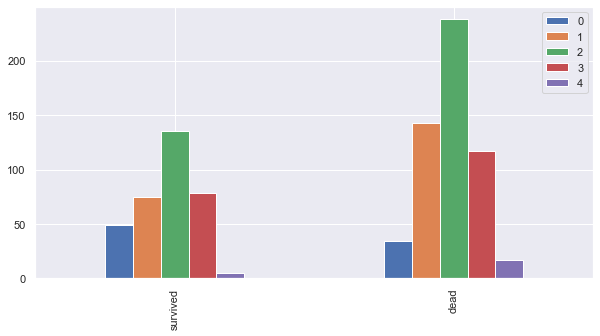

In [67]:
bar_chart("Age")

# Embarked 데이터 채우기

In [69]:
train[train["Embarked"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,3,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,4,0,0,113572,80.0,B28,NaN


###  Embarked

1. 최빈값 
2. 검색

In [73]:
train[train["Pclass"]==1].loc[:,"Embarked"].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [74]:
train["Embarked"] =train["Embarked"].fillna("S")

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       891 non-null    category
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  891 non-null    object  
dtypes: category(1), float64(1), int64(4), object(5)
memory usage: 117.6+ KB


In [76]:
# 성별, 승선장소 컴퓨터가 알아 먹기 쉽게 mapping 한다.

train.loc[train["Sex"]=="female","Sex"] = 1
train.loc[train["Sex"]=="male","Sex"] = 0

train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",1,2,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,S


In [78]:
train.loc[train["Embarked"]=="S","Embarked"] = 0
train.loc[train["Embarked"]=="C","Embarked"] = 1
train.loc[train["Embarked"]=="Q","Embarked"] = 2

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,C85,1
3,1,3,"Heikkinen, Miss. Laina",1,2,0,0,STON/O2. 3101282,7.9250,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0
5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0


In [79]:
# 새로운 컬럼 -- familysize

train["FamilySize"] = train["SibSp"] + train["Parch"] +1

train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,C85,1,2
3,1,3,"Heikkinen, Miss. Laina",1,2,0,0,STON/O2. 3101282,7.9250,NaN,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,2
5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,1


In [146]:
# 11+1 개의 컬럼 중에서 분석에 사용할 컬럼 선택

feature = ["Pclass","Sex","Age","Embarked","FamilySize"]
X_train = train[feature]
X_train.head()

,Pclass,Sex,Age,Embarked,FamilySize
PassengerId,,,,,
1,3,0,1,0,2
2,1,1,3,1,2
3,3,1,2,0,1
4,1,1,2,0,2
5,3,0,2,0,1


In [147]:
# 정답
y_train = train["Survived"]
y_train.head(5)

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [148]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [149]:
predict = model.predict(X_test)
predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# 실습

In [125]:
test = pd.read_csv("test.csv", index_col = "PassengerId")
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [122]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pclass      418 non-null    int64   
 1   Name        418 non-null    object  
 2   Sex         418 non-null    object  
 3   Age         418 non-null    category
 4   SibSp       418 non-null    int64   
 5   Parch       418 non-null    int64   
 6   Ticket      418 non-null    object  
 7   Fare        417 non-null    float64 
 8   Cabin       91 non-null     object  
 9   Embarked    418 non-null    int64   
 10  FamilySize  418 non-null    int64   
dtypes: category(1), float64(1), int64(5), object(4)
memory usage: 36.5+ KB


# 해야 할 일

- Age 컬럼 결측치 채우기
- FamilySize라는 컬럼 만들기
- Age 카테고리화
- Sex, Embarked 매핑

- X_test = test[feature] 문장이 실행되게 해야함.


In [129]:
test_age = test[test["Age"].isnull()]
test_age[["Age","Sex"]]

,Age,Sex
PassengerId,,
902,NaN,0
914,NaN,1
921,NaN,0
925,NaN,1
928,NaN,1
...,...,...
1300,NaN,1
1302,NaN,1
1305,NaN,0


In [130]:
test.groupby("Sex").size()

test.groupby("Sex")["Age"].median()

Sex
0    27.0
1    27.0
Name: Age, dtype: float64

In [131]:
test["Age"] = test["Age"].fillna(test.groupby("Sex")["Age"].transform('median'))

In [113]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pclass      418 non-null    int64   
 1   Name        418 non-null    object  
 2   Sex         418 non-null    object  
 3   Age         418 non-null    category
 4   SibSp       418 non-null    int64   
 5   Parch       418 non-null    int64   
 6   Ticket      418 non-null    object  
 7   Fare        417 non-null    float64 
 8   Cabin       91 non-null     object  
 9   Embarked    418 non-null    int64   
 10  FamilySize  418 non-null    int64   
dtypes: category(1), float64(1), int64(5), object(4)
memory usage: 36.5+ KB


In [132]:
bins = [0,15,25,35,60,99]
label = ['0','1','2','3','4']

test_cut = pd.cut(test.loc[:, "Age"],bins, labels = label)

test["Age"] = test_cut
test.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",0,2,0,0,330911,7.8292,NaN,2
893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3,1,0,363272,7.0000,NaN,0
894,2,"Myles, Mr. Thomas Francis",0,4,0,0,240276,9.6875,NaN,2
895,3,"Wirz, Mr. Albert",0,2,0,0,315154,8.6625,NaN,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,12.2875,NaN,0


In [142]:
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1
test.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",0,2,0,0,330911,7.8292,NaN,2,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3,1,0,363272,7.0000,NaN,0,2
894,2,"Myles, Mr. Thomas Francis",0,4,0,0,240276,9.6875,NaN,2,1
895,3,"Wirz, Mr. Albert",0,2,0,0,315154,8.6625,NaN,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,12.2875,NaN,0,3


In [134]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pclass      418 non-null    int64   
 1   Name        418 non-null    object  
 2   Sex         418 non-null    object  
 3   Age         418 non-null    category
 4   SibSp       418 non-null    int64   
 5   Parch       418 non-null    int64   
 6   Ticket      418 non-null    object  
 7   Fare        417 non-null    float64 
 8   Cabin       91 non-null     object  
 9   Embarked    418 non-null    object  
 10  FamilySize  418 non-null    int64   
dtypes: category(1), float64(1), int64(4), object(5)
memory usage: 36.5+ KB


In [136]:
feature = ["Pclass","Sex","Age","Embarked","FamilySize"]
X_test = test[feature]
X_test.head()

,Pclass,Sex,Age,Embarked,FamilySize
PassengerId,,,,,
892,3,0,2,2,1
893,3,1,3,0,2
894,2,0,4,2,1
895,3,0,2,0,1
896,3,1,1,0,3


In [140]:
test.loc[test["Sex"]=="female","Sex"] = 1
test.loc[test["Sex"]=="male","Sex"] = 0

test.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",0,2,0,0,330911,7.8292,NaN,2,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3,1,0,363272,7.0000,NaN,0,2
894,2,"Myles, Mr. Thomas Francis",0,4,0,0,240276,9.6875,NaN,2,1
895,3,"Wirz, Mr. Albert",0,2,0,0,315154,8.6625,NaN,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,12.2875,NaN,0,3


In [141]:
test.loc[test["Embarked"]=="S","Embarked"] = 0
test.loc[test["Embarked"]=="C","Embarked"] = 1
test.loc[test["Embarked"]=="Q","Embarked"] = 2

test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",0,2,0,0,330911,7.8292,NaN,2,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3,1,0,363272,7.0000,NaN,0,2
894,2,"Myles, Mr. Thomas Francis",0,4,0,0,240276,9.6875,NaN,2,1
895,3,"Wirz, Mr. Albert",0,2,0,0,315154,8.6625,NaN,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,12.2875,NaN,0,3


In [144]:
X_test = test[feature]
X_test

,Pclass,Sex,Age,Embarked,FamilySize
PassengerId,,,,,
892,3,0,2,2,1
893,3,1,3,0,2
894,2,0,4,2,1
895,3,0,2,0,1
896,3,1,1,0,3
...,...,...,...,...,...
1305,3,0,2,0,1
1306,1,1,3,1,1
1307,3,0,3,0,1
